<a href="https://colab.research.google.com/github/yiftachsa/AI-Advanced/blob/main/time_series_pattern_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#make data sintetis
np.random.seed(42)
n = 200
t = np.linspace(0,10,n)
trend = 0.5 * t
seasonal = np.sin(2 * np.pi * t)
cyclical = 0.2 * np.sin (2 * np.pi * t / 5)
noise = 0.2*np.random.normal(size=n)
data = trend+seasonal+cyclical+noise

df = pd.DataFrame(data, columns=['Sales'])
df.index = pd.date_range(start='2010-01-01', periods=n, freq='MS')


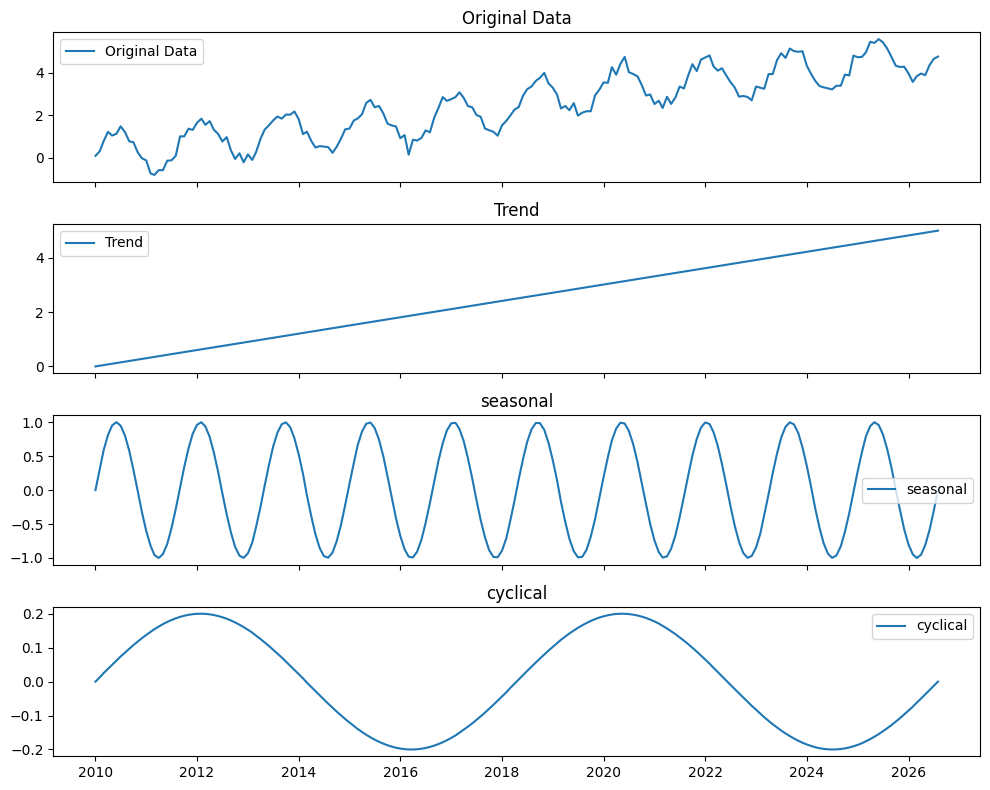

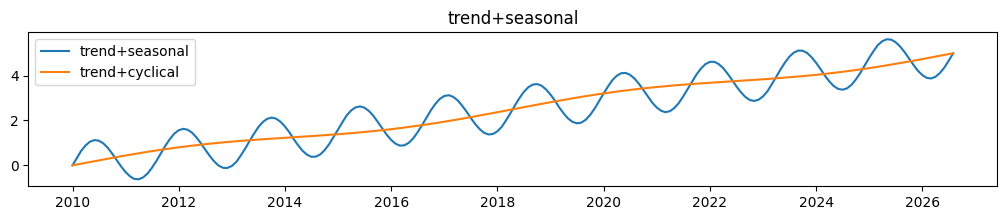

In [6]:
def plot_lines(x, Y, labels):
  fig, axes=plt.subplots(len(Y),1, figsize=(10,8),sharex=True)
  for i, y in enumerate(Y):
    axes[i].plot(x, y, label=labels[i])
    axes[i].set_title(labels[i])
    axes[i].legend()
  plt.tight_layout()
  plt.show()

Y = [data, trend, seasonal, cyclical]
labels = ['Original Data', 'Trend', 'seasonal', 'cyclical']
plot_lines(df.index, Y, labels)

fig = plt.figure(figsize=(12.5,2))
ax = fig.add_subplot(111)
ax.plot(df.index, trend+seasonal,  label='trend+seasonal')
ax.plot(df.index, trend+cyclical,  label='trend+cyclical')
# ax.plot(df.index, trend+seasonal+cyclical,  label='trend+seasonal+cyclical')
ax.set_title('trend+seasonal')
ax.legend()

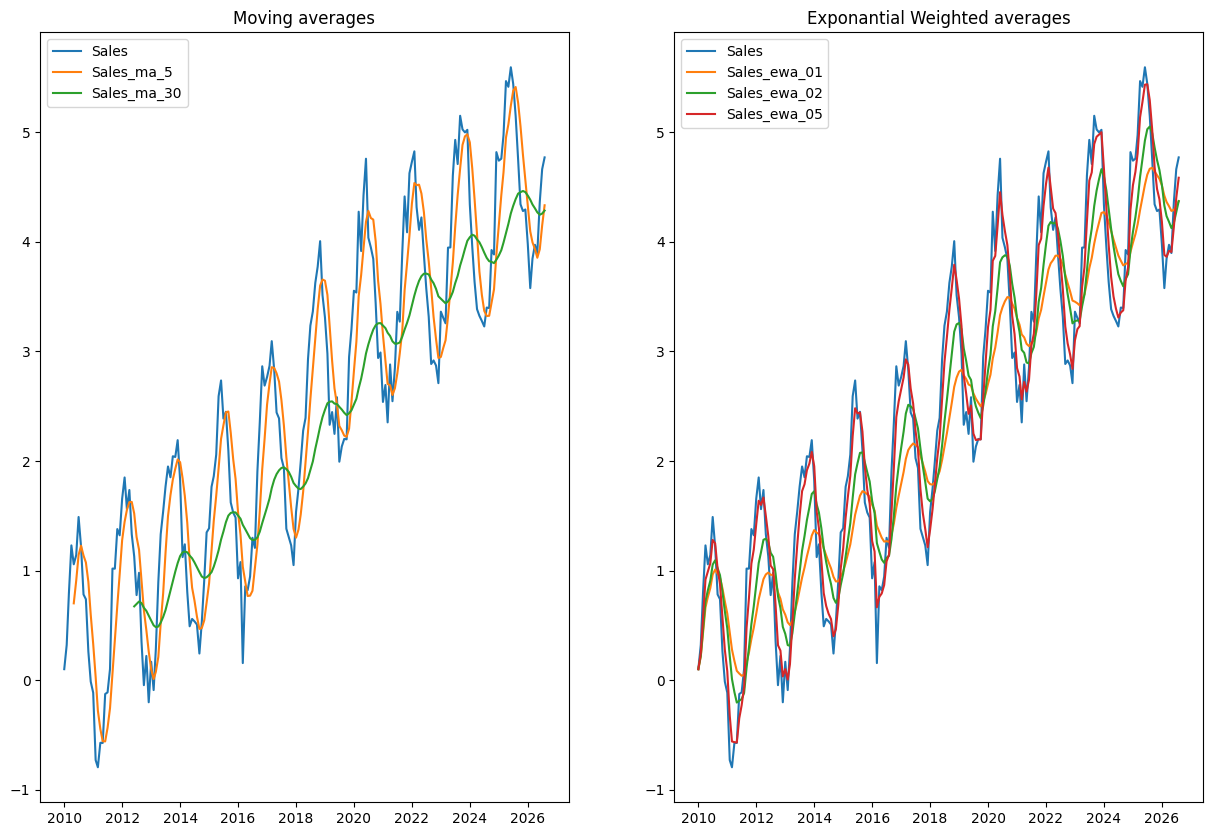

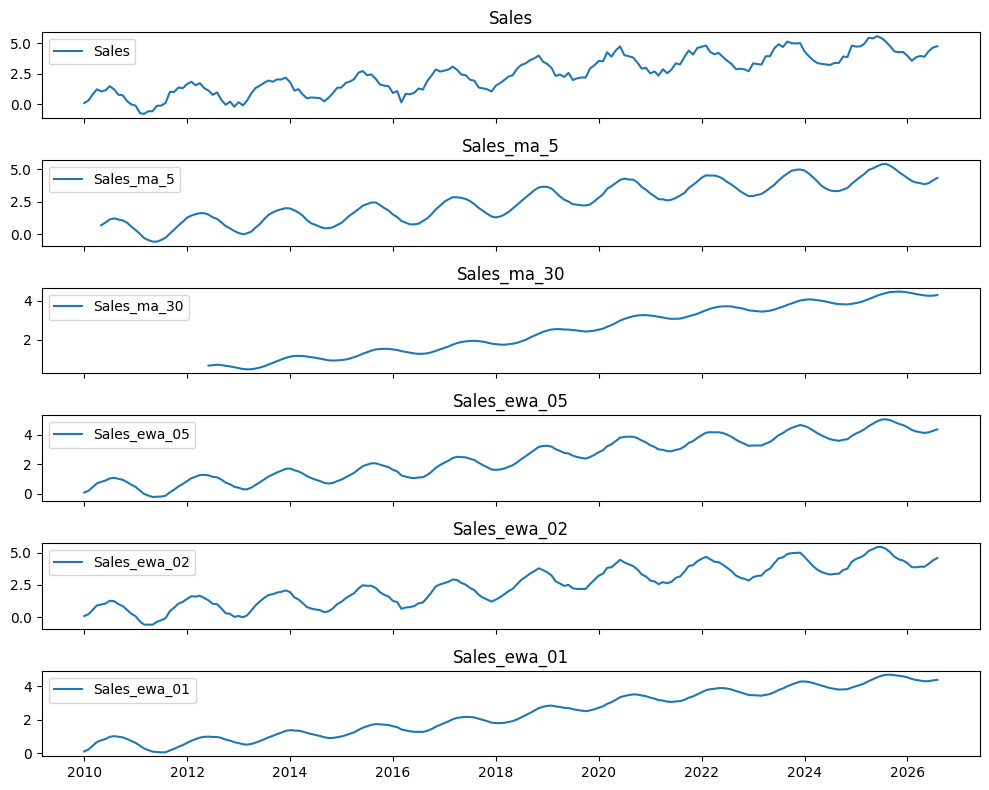

In [7]:
short_window = 5
month_window = 30
df["Sales_ma_5"] = df["Sales"].rolling(window=short_window).mean()
df["Sales_ma_30"] = df["Sales"].rolling(window=month_window).mean()


df["Sales_ewa_01"] = df["Sales"].ewm(alpha=0.1).mean()
df["Sales_ewa_02"] = df["Sales"].ewm(alpha=0.2).mean()
df["Sales_ewa_05"] = df["Sales"].ewm(alpha=0.5).mean()


fig, axes = plt.subplots(1,2, figsize=(15,10))
axes[0].plot(df.index, df['Sales'],  label='Sales')
axes[0].plot(df.index, df['Sales_ma_5'],  label='Sales_ma_5')
axes[0].plot(df.index, df['Sales_ma_30'],  label='Sales_ma_30')
axes[0].set_title('Moving averages')
axes[0].legend()

axes[1].plot(df.index, df['Sales'],  label='Sales')
axes[1].plot(df.index, df['Sales_ewa_01'],  label='Sales_ewa_01')
axes[1].plot(df.index, df['Sales_ewa_02'],  label='Sales_ewa_02')
axes[1].plot(df.index, df['Sales_ewa_05'],  label='Sales_ewa_05')
axes[1].set_title('Exponantial Weighted averages')
axes[1].legend()

Y = [df['Sales'], df["Sales_ma_5"], df["Sales_ma_30"], df["Sales_ewa_02"], df["Sales_ewa_05"], df["Sales_ewa_01"]]
labels = ['Sales', 'Sales_ma_5', 'Sales_ma_30', 'Sales_ewa_05', 'Sales_ewa_02', 'Sales_ewa_01']
plot_lines(df.index, Y, labels)

In [ ]:
df

,Sales,Sales_ma_5,Sales_ma_30,Sales_ewa_01,Sales_ewa_02,Sales_ewa_05
2010-01-01,0.099343,NaN,NaN,0.099343,0.099343,0.099343
2010-02-01,0.320612,NaN,NaN,0.215800,0.222270,0.246856
2010-03-01,0.795318,NaN,NaN,0.429644,0.457126,0.560262
2010-04-01,1.229437,NaN,NaN,0.662210,0.718749,0.917155
2010-05-01,1.056643,0.700271,NaN,0.758528,0.819265,0.989149
...,...,...,...,...,...,...
2026-04-01,3.973589,3.934686,4.306442,4.325559,4.182922,3.918787
2026-05-01,3.898398,3.855174,4.269737,4.282842,4.126017,3.908592
2026-06-01,4.364965,3.932384,4.247798,4.291055,4.173807,4.136779
2026-07-01,4.663377,4.149453,4.258511,4.328287,4.271721,4.400078


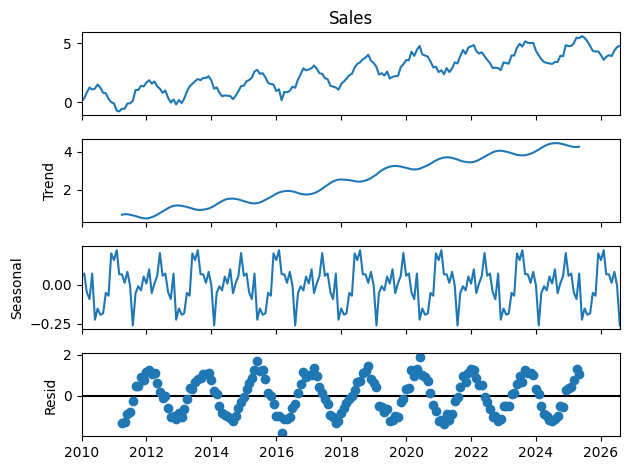

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Sales'], model='additive', period=30)  # e.g., monthly seasonality
result.plot()
plt.show()

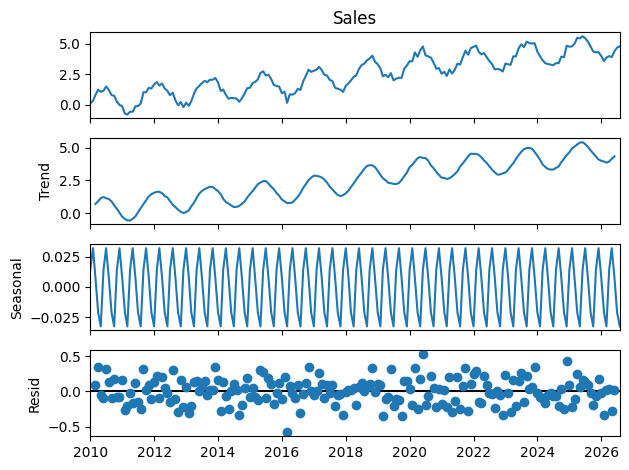

In [ ]:
result = seasonal_decompose(df['Sales'], model='additive', period=5)  # e.g., weekly seasonality
result.plot()
plt.show()

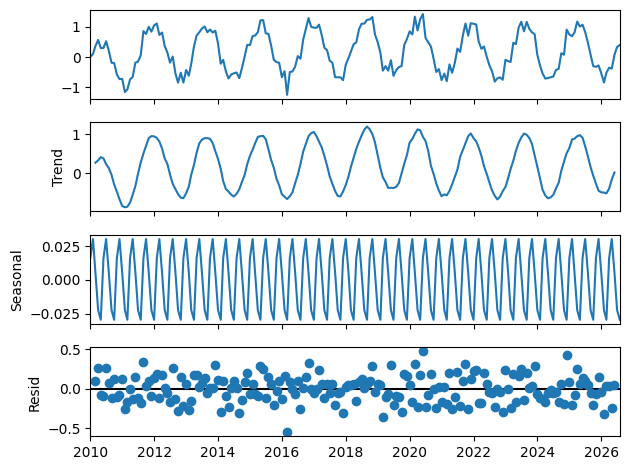

In [ ]:
result = seasonal_decompose(df['Sales']-df["Sales_ewa_01"], model='additive', period=5)  # e.g., weekly seasonality
result.plot()
plt.show()

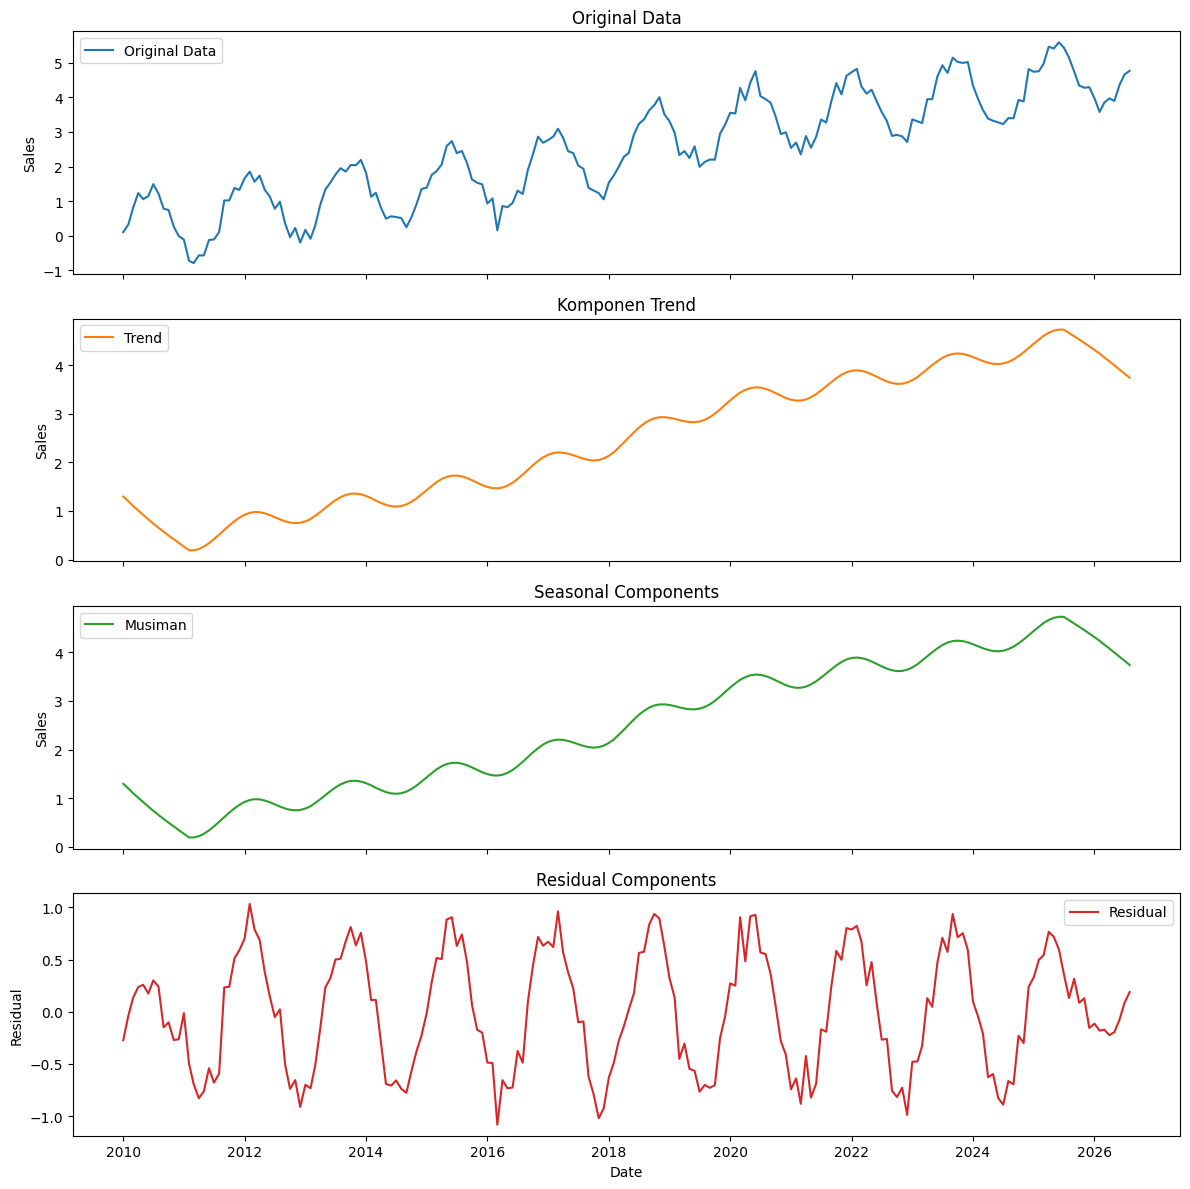

In [ ]:
from statsmodels.tsa.seasonal import STL

#perform STL Decomposition
stl = STL(df['Sales'], seasonal=5)
result = stl.fit()

#describes the decomposition results
fig, axes = plt.subplots (4,1, figsize=(12,12), sharex=True)

axes[0].plot(df.index, df['Sales'], label= 'Original Data')
axes[0].set_ylabel('Sales')
axes[0].set_title('Original Data')
axes[0].legend()

axes[1].plot(df.index, result.trend, label='Trend', color='C1')
axes[1].set_ylabel('Sales')
axes[1].set_title('Komponen Trend')
axes[1].legend()

axes[2].plot(df.index, result.trend, label='Musiman', color='C2')
axes[2].set_ylabel('Sales')
axes[2].set_title('Seasonal Components')
axes[2].legend()

axes[3].plot(df.index, result.resid, label='Residual', color='C3')
axes[3].set_ylabel('Residual')
axes[3].set_title('Residual Components')
axes[3].legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()

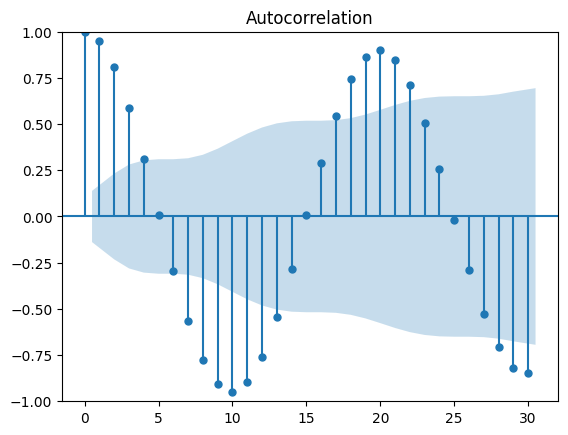

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(np.sin(2 * np.pi * t), lags=30)
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0g74sr27/hvt39fi5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0g74sr27/azgao812.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45828', 'data', 'file=/tmp/tmp0g74sr27/hvt39fi5.json', 'init=/tmp/tmp0g74sr27/azgao812.json', 'output', 'file=/tmp/tmp0g74sr27/prophet_modelkda3_mvz/prophet_model-20250422130139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:01:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:01:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


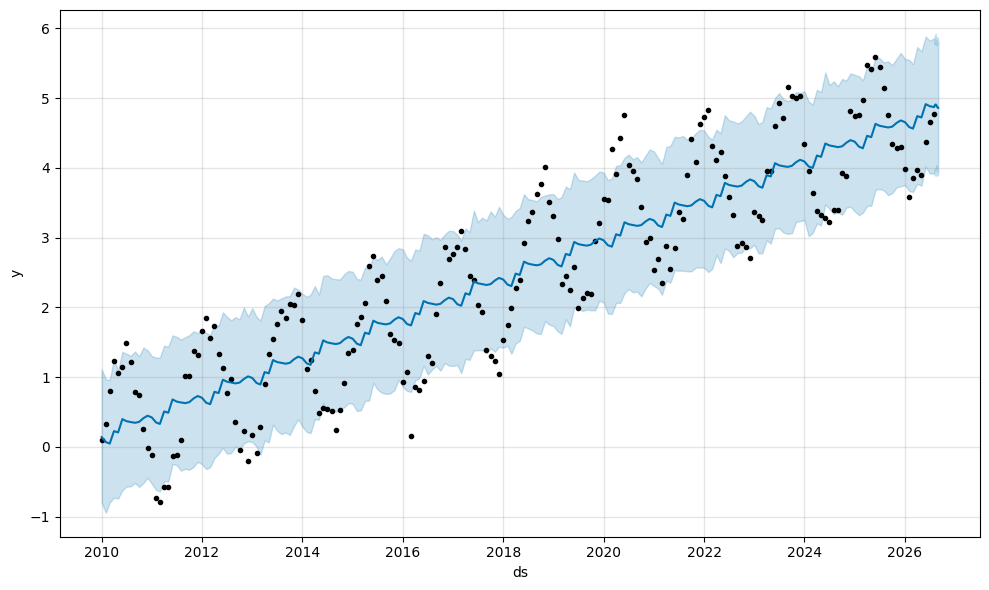

In [ ]:
from prophet import Prophet
import pandas as pd

# Prepare data
df_prophet = pd.DataFrame({
    'ds': df.index,
    'y': df['Sales']
})

# Fit model
model = Prophet()
model.fit(df_prophet)

# Forecast future
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot results
model.plot(forecast)
plt.show()

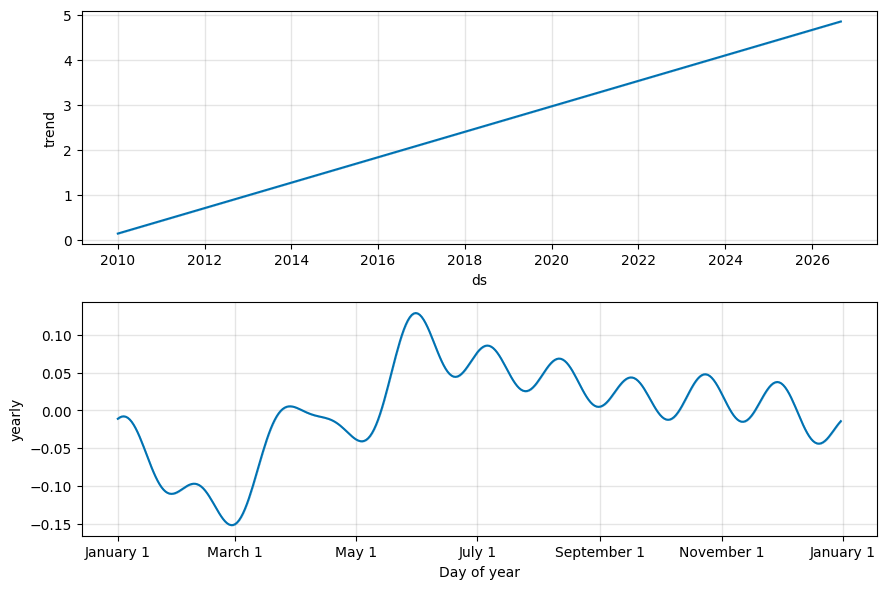

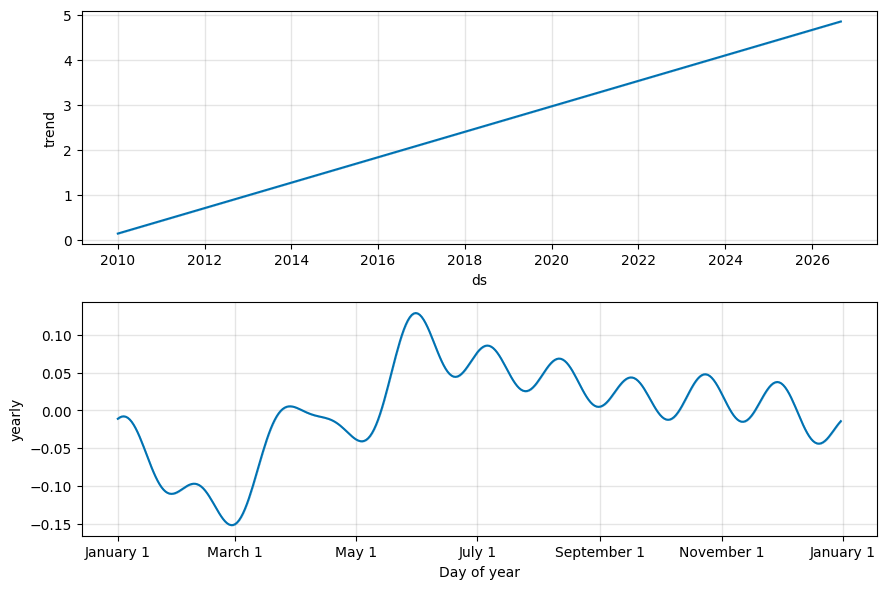

In [ ]:
model.plot_components(forecast)